In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df.head()

Time        V1        V2        V3  ...       V27       V28  Amount  Class
0     0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62    0.0
1     0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69    0.0
2     1 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66    0.0
3     1 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50    0.0
4     2 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99    0.0

[5 rows x 31 columns]

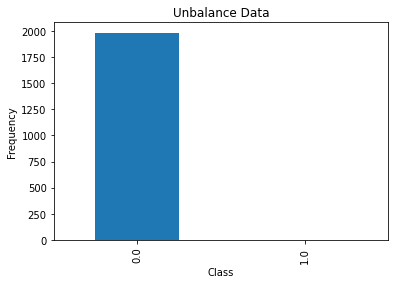

In [ ]:
count = pd.value_counts(df['Class'], sort = True).sort_index()
count.plot(kind = 'bar')
plt.title('Unbalance Data')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [ ]:
No_of_frauds= len(df[df["Class"]==1])
No_of_normals = len(df[df["Class"]==0])
total= No_of_frauds + No_of_normals
Fraud_percent= (No_of_frauds / total)*100
Normal_percent= (No_of_normals / total)*100

print("The number of normal transactions(Class 0) are: ", No_of_normals)
print("The number of fraudulent transactions(Class 1) are: ", No_of_frauds)
print("Class 0 percentage = ", Normal_percent)
print("Class 1 percentage = ", Fraud_percent)

The number of normal transactions(Class 0) are:  1983
The number of fraudulent transactions(Class 1) are:  2
Class 0 percentage =  99.8992443324937
Class 1 percentage =  0.10075566750629722


**Resampling data**

In [ ]:
df['normAmount']=StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
X=df.drop(['Time','Amount'],axis=1)
y=df['Class']

print(X)
print(y)

            V1        V2        V3  ...       V28  Class  normAmount
0    -1.359807 -0.072781  2.536347  ... -0.021053    0.0    0.335315
1     1.191857  0.266151  0.166480  ...  0.014724    0.0   -0.272798
2    -1.358354 -1.340163  1.773209  ... -0.059752    0.0    1.283265
3    -0.966272 -0.185226  1.792993  ...  0.061458    0.0    0.227210
4    -1.158233  0.877737  1.548718  ...  0.215153    0.0    0.005743
...        ...       ...       ...  ...       ...    ...         ...
1981 -0.340622  1.132232  1.291494  ...  0.098336    0.0   -0.261789
1982 -1.842696  1.740641  0.861526  ...  0.352610    0.0   -0.279793
1983 -0.480693  0.646091  1.577264  ...  0.051504    0.0    0.050069
1984 -0.342132  1.091125  1.282729  ...  0.097139    0.0   -0.269073
1985 -0.854343  1.382948  1.278665  ...       NaN    NaN         NaN

[1986 rows x 30 columns]
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1981    0.0
1982    0.0
1983    0.0
1984    0.0
1985    NaN
Name: Class, L

**SPLITTING DATA**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 12)
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)


X_train.shape:  (1330, 30)
X_test.shape:  (656, 30)
y_train.shape:  (1330,)
y_test.shape:  (656,)


**SVM MODEL**

In [ ]:
import numpy as np
classifier= svm.SVC(C= 1, kernel= 'linear', random_state= 0)
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y_train = y_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
#Fit into Model
classifier.fit(X_train, y_train)

#Predict the class using X_test
y_pred = classifier.predict(X_test)

con_mat = confusion_matrix(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
cls_report = classification_report(y_test, y_pred)

In [ ]:
print("Area under the curve : %f" % (roc_auc_score(y_test, y_pred)))
print("Average precision-recall score RF: {}".format(average_precision))
print(con_mat)
print(cls_report)

Area under the curve : 0.498473
Average precision-recall score RF: 0.001524390243902439
[[653   2]
 [  1   0]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       655
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00       656
   macro avg       0.50      0.50      0.50       656
weighted avg       1.00      1.00      1.00       656



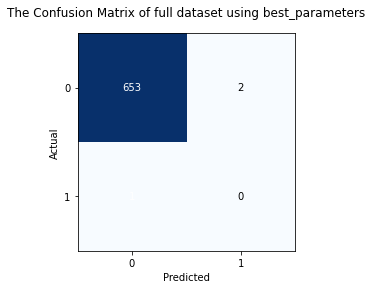

The accuracy is 99.54268292682927 %
The recall from the confusion matrix is 0.0 %


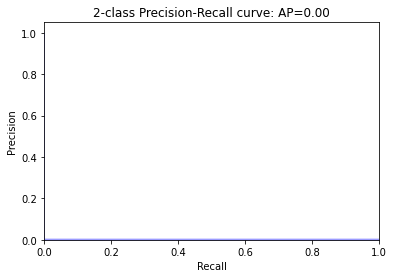

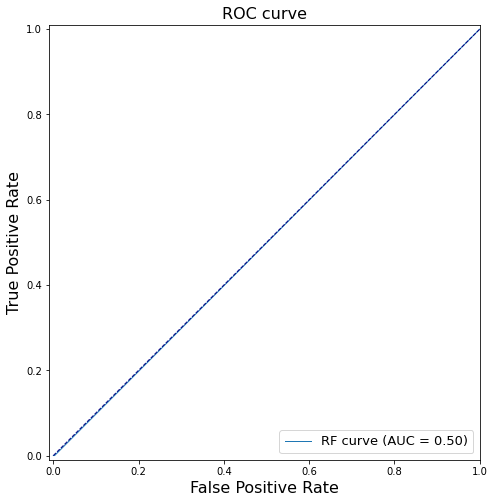

In [ ]:
def confus_matrix(CM):
    fig, ax = plot_confusion_matrix(conf_mat= CM)
    plt.title("The Confusion Matrix of full dataset using best_parameters")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()
    print("The accuracy is "+str((CM[1,1]+CM[0,0])/(CM[0,0] + CM[0,1]+CM[1,0] + CM[1,1])*100) + " %")
    print("The recall from the confusion matrix is "+ str(CM[1,1]/(CM[1,0] + CM[1,1])*100) +" %")
confus_matrix(con_mat)

precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()